<a href="https://colab.research.google.com/github/d-atallah/implicit_gender_bias/blob/main/07_Supervised_Feature_Importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import, Download, & Variable Statements

In [ ]:
!pip install shap

In [ ]:
!pip install pydantic==1.8.2 typing-extensions==4.0.1

In [ ]:
! pip uninstall shap


Found existing installation: shap 0.44.1
Uninstalling shap-0.44.1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/shap-0.44.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/shap/*
Proceed (Y/n)? Y
  Successfully uninstalled shap-0.44.1


In [ ]:
! pip install shap

  Using cached shap-0.44.1-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (535 kB)


In [3]:
## Import & download statements
# General Statements
import pandas as pd
import string
import re
import joblib
import os
import numpy as np
import time
#import shap
import matplotlib.pyplot as plt


# Feature selection & Model tuning
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, StratifiedKFold, cross_validate
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import TruncatedSVD,PCA, NMF
from sklearn.metrics import confusion_matrix,precision_score, recall_score, f1_score, accuracy_score, roc_curve, roc_auc_score, log_loss, make_scorer, average_precision_score

from xgboost import XGBClassifier

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Read Inputs

In [7]:
# Variables
folder_path = '/content/drive/MyDrive/Supervised Learning Notebooks/'#/home/gibsonce/datallah-jaymefis-gibsonce/'
model = 'xgb'

# Load DataFrames from pkl files
y_train = pd.read_pickle(folder_path + 'y_train.pkl')
y_test = pd.read_pickle(folder_path + 'y_test.pkl')
X_test = joblib.load(f'{folder_path}{model}_X_test.pkl')
X_train = joblib.load(f'{folder_path}{model}_X_train.pkl')
pipeline = joblib.load(f'{folder_path}{model}_pipeline.pkl')
#shap = joblib.load(f'{folder_path}{model}_shap.pkl')
features = joblib.load(f'{folder_path}{model}_features.pkl')

## Feature Importance

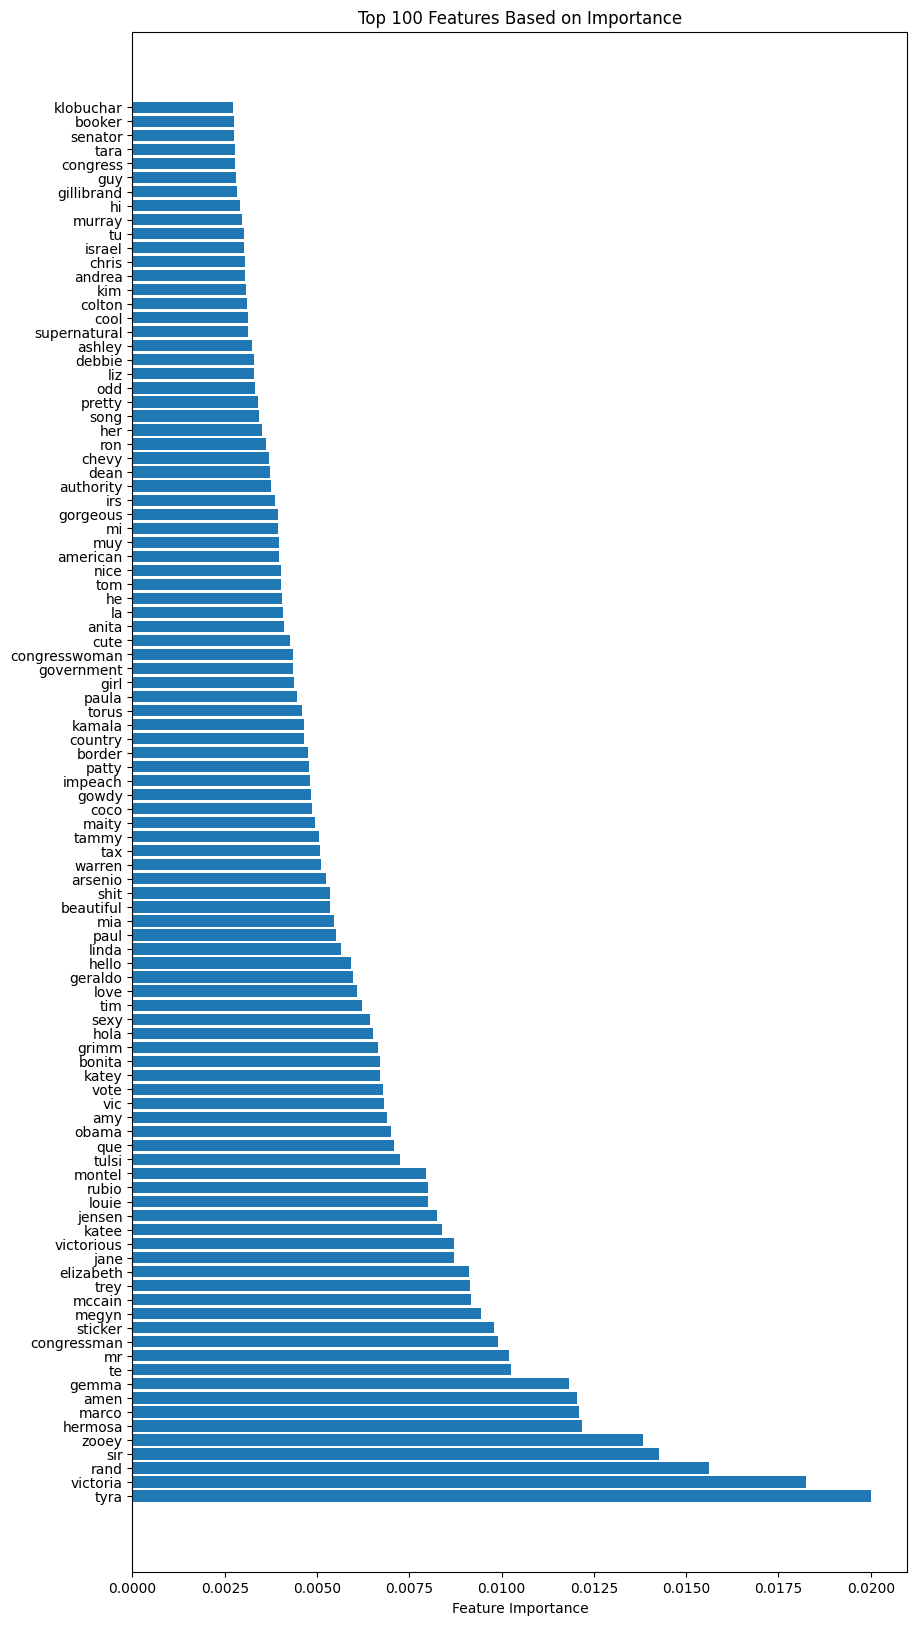

In [10]:
import matplotlib.pyplot as plt

feature_names, importance_values = zip(*features.items())

# Sort features based on importance values in descending order
sorted_indices = sorted(range(len(importance_values)), key=lambda k: importance_values[k], reverse=True)
sorted_feature_names = [feature_names[i] for i in sorted_indices]
sorted_importance_values = [importance_values[i] for i in sorted_indices]

# Plot the top N features
top_n = 100
plt.figure(figsize=(10, 20))
plt.barh(range(top_n), sorted_importance_values[:top_n], align='center')
plt.yticks(range(top_n), sorted_feature_names[:top_n])
plt.xlabel('Feature Importance')
plt.title(f'Top {top_n} Features Based on Importance')
plt.show()

In [ ]:
# Shap is not working in colab

In [ ]:
# Assuming X_test is your test set features (make sure it's in the same order as the model input)
shap_values = shap.shap_values(X_test)


NameError: name 'shap' is not defined

In [ ]:

# Create a beeswarm plot
shap.summary_plot(shap_values, X_test, feature_names=feature_names, max_display=25)

# Display the plot
plt.show()